## Titanic Survival Predictions
In this dataset, you will train a logistic regression model that can predict the survivors based on a set of features about the passenger. Start first by taking some time to understand your data. You can find more info about the data and its breakdown in this link https://www.kaggle.com/c/titanic/data

### Start with Data Exploring
Your data is split into two files. One for training and one for testing. Load both and find out the number of samples and features in each file

In [27]:
import pandas as pd

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

print(test.head(5))
print(train.head(5))

print(test.shape)
print(train.shape)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1 

How many survivors in the training set?

In [28]:
survivedCount = train.query('Survived == 1')['Survived']
print("There are " + str(len(survivedCount)) + " survivors in the training set.")

There are 342 survivors in the training set.


Can you find Jack and Rose in the data? Use some code. You probably won't find them as they were fictional characters. See if you can find Beatrice Irene Sandstorm? Read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [29]:
print("Training set finding Jack and Rose\n")
findJack = train.loc[train['Name'].str.contains(' Jack ')]
print(findJack)
findRose = train.loc[train['Name'].str.contains(' Rose ')]
print(findRose)

print("\nTesting set finding Jack and Rose\n")

findJack2 = test.loc[test['Name'].str.contains(' Jack ')]
print(findJack2)
findRose2 = test.loc[test['Name'].str.contains(' Rose ')]
print(findRose2)

print("\nFinding Beatrice\n")

print("Training set")
findBeatrice = train.loc[train['Name'].str.contains('Beatrice')]
print(findBeatrice)

print("\nTesting set")
findBeatrice2 = test.loc[test['Name'].str.contains('Beatrice')]
print(findBeatrice2)

Training set finding Jack and Rose

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Testing set finding Jack and Rose

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Finding Beatrice

Training set
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Testing set
     PassengerId  Pclass                             Name     Sex  Age  SibSp  \
117         1009       3  Sandstrom, Miss. Beatrice Irene  female  1.0      1   

     Parch   Ticket  Fare Cabin Embarked  
117      1  PP 9549  16.7    G6        S  


### Does features make a difference?
In the training dataset (file)
- Pclass - Usually, higher class (class 1) meant a more expensive fare and the other classes paid lesser to be on the ship. What was the survival rate per class?
- Sex — What was the survival rate of women?
- SibSp — What was the survival rate based on number of siblings the passenger had on the ship?
- Parch — What was the survival rate based on number of parents/children the passenger had on the ship?

In [30]:
# Finding the survival rate for each Pclass

class1 = train[train['Pclass'] == 1]
survivedClass1 = class1.loc[class1['Survived'] == 1]
surviveRate1 = (len(survivedClass1)/len(class1))*100
print("Class 1 survival rate: " + str(round(surviveRate1, 2)) + "%")

class2 = train[train['Pclass'] == 2]
survivedClass2 = class2.loc[class2['Survived'] == 1]
surviveRate2 = (len(survivedClass2)/len(class2))*100
print("Class 2 survival rate: " + str(round(surviveRate2, 2)) + "%")

class3 = train[train['Pclass'] == 3]
survivedClass3 = class3.loc[class3['Survived'] == 1]
surviveRate3 = (len(survivedClass3)/len(class3))*100
print("Class 3 survival rate: " + str(round(surviveRate3, 2)) + "%")

Class 1 survival rate: 62.96%
Class 2 survival rate: 47.28%
Class 3 survival rate: 24.24%


In [31]:
# Finding the survival rate for women

women = train[train['Sex'] == 'female']
survivedWomen = women.loc[women['Survived'] == 1]
surviveRatewomen = (len(survivedWomen)/len(women))*100
print("Women survival rate: " + str(round(surviveRatewomen, 2)) + "%")

Women survival rate: 74.2%


In [32]:
# Finding the survival rate for passengers with siblings

print(train["SibSp"].value_counts()) # 0, 1, 2, 3, 4, 5, and 8 are the different values in this column

Sib0 = train[train['SibSp'] == 0]
survived0 = Sib0.loc[Sib0['Survived'] == 1]
surviveRateSib0 = (len(survived0)/len(Sib0))*100
print("0 siblings survival rate: " + str(round(surviveRateSib0, 2)) + "%")

Sib1 = train[train['SibSp'] == 1]
survived1 = Sib1.loc[Sib1['Survived'] == 1]
surviveRateSib1 = (len(survived1)/len(Sib1))*100
print("1 siblings survival rate: " + str(round(surviveRateSib1, 2)) + "%")

Sib2 = train[train['SibSp'] == 2]
survived2 = Sib2.loc[Sib2['Survived'] == 1]
surviveRateSib2 = (len(survived2)/len(Sib2))*100
print("2 siblings survival rate: " + str(round(surviveRateSib2, 2)) + "%")

Sib3 = train[train['SibSp'] == 3]
survived3 = Sib3.loc[Sib3['Survived'] == 1]
surviveRateSib3 = (len(survived3)/len(Sib3))*100
print("3 siblings survival rate: " + str(round(surviveRateSib3, 2)) + "%")

Sib4 = train[train['SibSp'] == 4]
survived4 = Sib4.loc[Sib4['Survived'] == 1]
surviveRateSib4 = (len(survived4)/len(Sib4))*100
print("4 siblings survival rate: " + str(round(surviveRateSib4, 2)) + "%")

Sib5 = train[train['SibSp'] == 5]
survived5 = Sib5.loc[Sib5['Survived'] == 1]
surviveRateSib5 = (len(survived5)/len(Sib5))*100
print("5 siblings survival rate: " + str(round(surviveRateSib5, 2)) + "%")

Sib8 = train[train['SibSp'] == 8]
survived8 = Sib8.loc[Sib8['Survived'] == 1]
surviveRateSib8 = (len(survived8)/len(Sib8))*100
print("8 siblings survival rate: " + str(round(surviveRateSib8, 2)) + "%")

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0 siblings survival rate: 34.54%
1 siblings survival rate: 53.59%
2 siblings survival rate: 46.43%
3 siblings survival rate: 25.0%
4 siblings survival rate: 16.67%
5 siblings survival rate: 0.0%
8 siblings survival rate: 0.0%


In [33]:
# Finding the survival rate for parents/children

print(train["Parch"].value_counts()) # 0, 1, 2, 3, 4, 5, and 6 are the different values in this column

Parch0 = train[train['Parch'] == 0]
survivedParch0 = Parch0.loc[Parch0['Survived'] == 1]
surviveRateParch0 = (len(survivedParch0)/len(Parch0))*100
print("0 Parch survival rate: " + str(round(surviveRateParch0, 2)) + "%")

Parch1 = train[train['Parch'] == 1]
survivedParch1 = Parch1.loc[Parch1['Survived'] == 1]
surviveRateParch1 = (len(survivedParch1)/len(Parch1))*100
print("1 Parch survival rate: " + str(round(surviveRateParch1, 2)) + "%")

Parch2 = train[train['Parch'] == 2]
survivedParch2 = Parch2.loc[Parch2['Survived'] == 1]
surviveRateParch2 = (len(survivedParch2)/len(Parch2))*100
print("2 Parch survival rate: " + str(round(surviveRateParch2, 2)) + "%")

Parch3 = train[train['Parch'] == 3]
survivedParch3 = Parch3.loc[Parch3['Survived'] == 1]
surviveRateParch3 = (len(survivedParch3)/len(Parch3))*100
print("3 Parch survival rate: " + str(round(surviveRateParch3, 2)) + "%")

Parch4 = train[train['Parch'] == 4]
survivedParch4 = Parch4.loc[Parch4['Survived'] == 1]
surviveRateParch4 = (len(survivedParch4)/len(Parch4))*100
print("4 Parch survival rate: " + str(round(surviveRateParch4, 2)) + "%")

Parch5 = train[train['Parch'] == 5]
survivedParch5 = Parch5.loc[Parch5['Survived'] == 1]
surviveRateParch5 = (len(survivedParch5)/len(Parch5))*100
print("5 Parch survival rate: " + str(round(surviveRateParch5, 2)) + "%")

Parch6 = train[train['Parch'] == 6]
survivedParch6 = Parch6.loc[Parch6['Survived'] == 1]
surviveRateParch6 = (len(survivedParch6)/len(Parch6))*100
print("8 Parch survival rate: " + str(round(surviveRateParch6, 2)) + "%")

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
0 Parch survival rate: 34.37%
1 Parch survival rate: 55.08%
2 Parch survival rate: 50.0%
3 Parch survival rate: 60.0%
4 Parch survival rate: 0.0%
5 Parch survival rate: 20.0%
8 Parch survival rate: 0.0%


Plot two histogram based on the age. One for the survivors and other for non survivors. According to the histogram was Jack more likely to survive or not survive and why?

Jack was more likely to not survive. Jack was 20 years old and based on the data we see that there was a higher chance of 20 year olds not surviving.


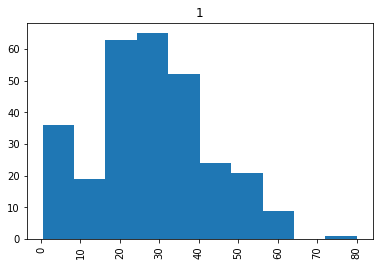

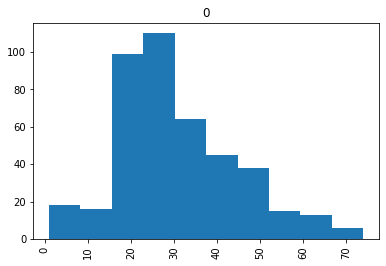

In [34]:
SurviveDF = train.loc[train['Survived'] == 1]
#print(len(SurviveDF))
NotSurviveDF = train.loc[train['Survived'] == 0]
#print(len(NotSurviveDF))

SurviveDF['Age'].hist(by=SurviveDF['Survived'])
NotSurviveDF['Age'].hist(by=NotSurviveDF['Survived'])

print('Jack was more likely to not survive. Jack was 20 years old and based on the data we see that there'
      ' was a higher chance of 20 year olds not surviving.')

Divide the age histograms into 3 X 2 subplots. Left column is for non survival data and the right one is for survivors. Each row is for one of the three PClasses

Text(0.5, 1.0, 'Class 3 Survived by Age')

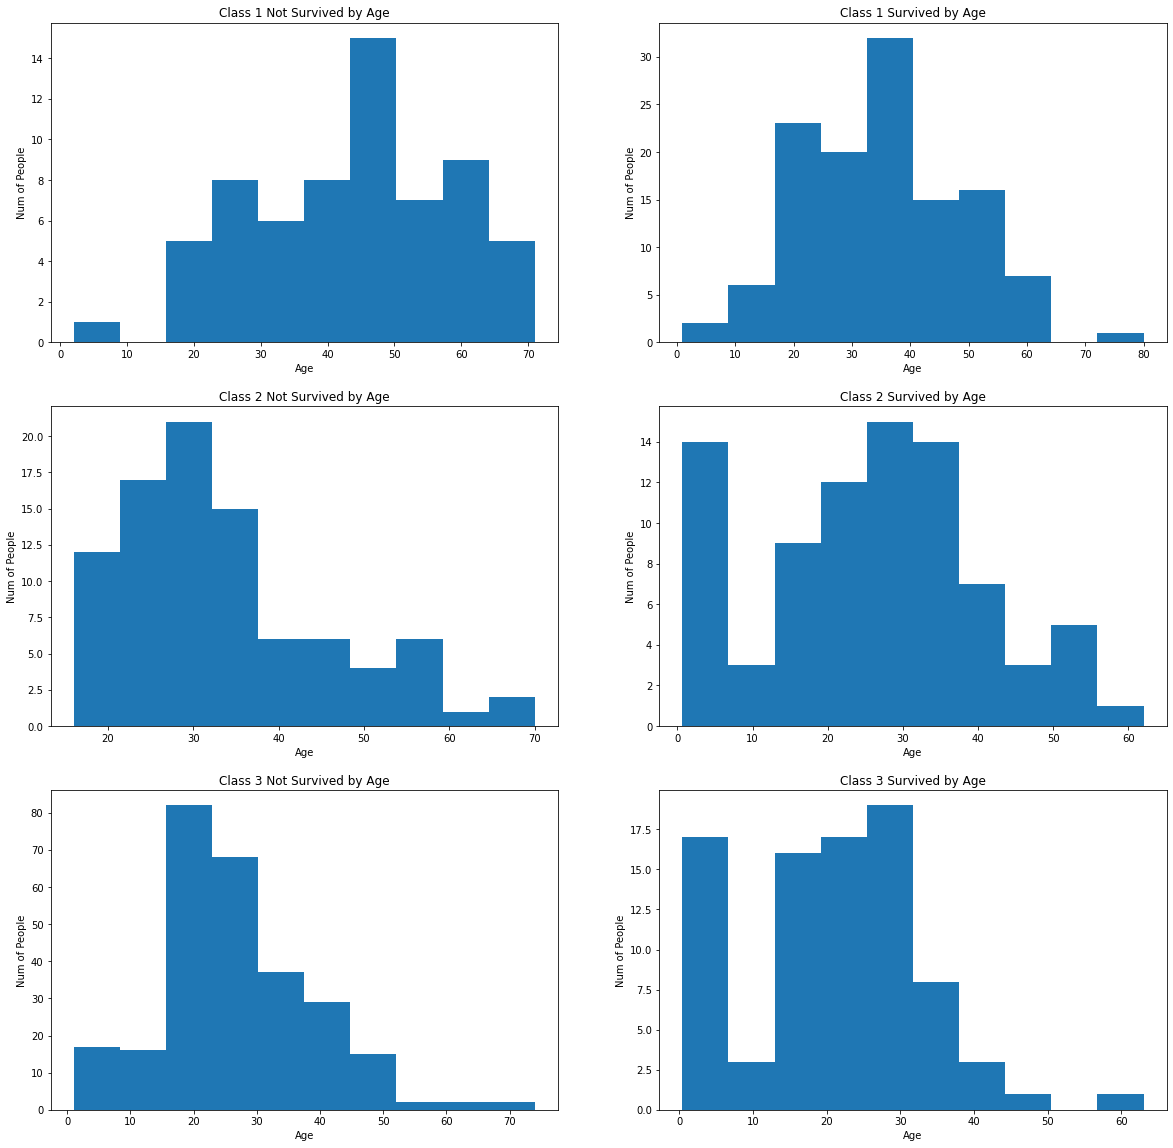

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20, 20))

#Class 1

Pclass1 = train[train['Pclass'] == 1] 
NsurvivedClass1 = Pclass1.loc[Pclass1['Survived'] == 0] # Not survived

plt.subplot(3,2, 1)
plt.hist(NsurvivedClass1['Age']) 
plt.xlabel('Age')
plt.ylabel('Num of People')
plt.title('Class 1 Not Survived by Age')


survivedClass1 = Pclass1.loc[Pclass1['Survived'] == 1] # Survived

plt.subplot(3,2, 2)
plt.hist(survivedClass1['Age']) 
plt.xlabel('Age')
plt.ylabel('Num of People')
plt.title('Class 1 Survived by Age')

#Class 2

Pclass2 = train[train['Pclass'] == 2]
NsurvivedClass2 = Pclass2.loc[Pclass2['Survived'] == 0] # Not survived

plt.subplot(3,2, 3)
plt.hist(NsurvivedClass2['Age']) 
plt.xlabel('Age')
plt.ylabel('Num of People')
plt.title('Class 2 Not Survived by Age')

survivedClass2 = Pclass2.loc[Pclass2['Survived'] == 1] # Survived

plt.subplot(3,2, 4)
plt.hist(survivedClass2['Age']) 
plt.xlabel('Age')
plt.ylabel('Num of People')
plt.title('Class 2 Survived by Age')

#Class 3

Pclass3 = train[train['Pclass'] == 3]
NsurvivedClass3 = Pclass3.loc[Pclass3['Survived'] == 0] # Not survived

plt.subplot(3,2, 5)
plt.hist(NsurvivedClass3['Age']) 
plt.xlabel('Age')
plt.ylabel('Num of People')
plt.title('Class 3 Not Survived by Age')

survivedClass3 = Pclass3.loc[Pclass3['Survived'] == 1] # Survived

plt.subplot(3,2, 6)
plt.hist(survivedClass3['Age']) 
plt.xlabel('Age')
plt.ylabel('Num of People')
plt.title('Class 3 Survived by Age')

## Fix missing Data in the Training Dataset
Which features in the training contains missing values? and how many missing values are there?

In [36]:
print(train.isnull().values.any())
numNan = train.isnull().sum().sum()
print("There are " + str(numNan) + " missing values.")

True
There are 866 missing values.


Find out the median age grouped by PClass and gender. Clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [37]:
print(train.groupby(['Pclass', 'Sex'])[['Age']].agg(['median']))

train['Age'].loc[(train['Pclass'] == 1) & (train['Sex'] == 'female') & (train['Age'].isnull())]= 35
train['Age'].loc[(train['Pclass'] == 1) & (train['Sex'] == 'male') & (train['Age'].isnull())]= 40

train['Age'].loc[(train['Pclass'] == 2) & (train['Sex'] == 'female') & (train['Age'].isnull())]= 28
train['Age'].loc[(train['Pclass'] == 2) & (train['Sex'] == 'male') & (train['Age'].isnull())]= 30

train['Age'].loc[(train['Pclass'] == 3) & (train['Sex'] == 'female') & (train['Age'].isnull())]= 21.5
train['Age'].loc[(train['Pclass'] == 3) & (train['Sex'] == 'male') & (train['Age'].isnull())]= 25

                 Age
              median
Pclass Sex          
1      female   35.0
       male     40.0
2      female   28.0
       male     30.0
3      female   21.5
       male     25.0


/Users/colinsuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/colinsuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/colinsuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [38]:
print(train['Age'].isnull().values.any()) 

False


For the Embarked column, substitute the missing value with the highest occurence value among the entire dataset

In [39]:
train['Embarked'].value_counts()

train['Embarked'].loc[(train['Embarked'].isnull())]= 'S'
print(train['Embarked'].isnull().values.any()) 

False


## Let's build our Model
Cabin, Name, ticket and Passenger Id are not important to our ML model. Let's get rid of them

In [40]:
df_train = train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

Make sure now that your data does not have any nulls

In [41]:
df_train['Embarked'].isnull().values.any()

False

We need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

% hint: `df_train['Embarked'].astype('category').cat.codes`

In [42]:
df_train['Embarked'] = df_train['Embarked'].astype('category').cat.codes
df_train['Sex'] = df_train['Sex'].astype('category').cat.codes
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


You are now ready to build a logistic regression model and fit it. You do not to split your data since I have already splitted for you in 2 different files so use all the training

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


X = df_train.iloc[:, df_train.columns != 'Survived']
Y = df_train['Survived']

logreg.fit(X, Y)

LogisticRegression()

Show the training score. 

In [44]:
print(logreg.score(X, Y))

0.8092031425364759


What are the coefficients. Make a plot that shows the importance of each feature in your model

[[-1.15301519e+00 -2.60440451e+00 -4.27681357e-02 -3.37290440e-01
  -8.00019906e-02  1.93074881e-03 -1.93603342e-01]]
[5.39339563]
Feature: 0, Score: -1.15302
Feature: 1, Score: -2.60440
Feature: 2, Score: -0.04277
Feature: 3, Score: -0.33729
Feature: 4, Score: -0.08000
Feature: 5, Score: 0.00193
Feature: 6, Score: -0.19360


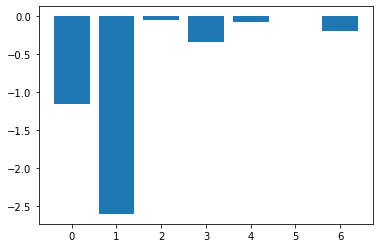

In [45]:
from matplotlib import pyplot

print(logreg.coef_) # These are the weights w
print(logreg.intercept_)

importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Use the logistic regression model on the test data to predict who will survive. You may need to do same cleaning you have done in the training data to the test data

In [46]:
# Data cleaning the test data

print(test.groupby(['Pclass', 'Sex'])[['Age']].agg(['median']))

test['Age'].loc[(test['Pclass'] == 1) & (test['Sex'] == 'female') & (test['Age'].isnull())]= 41
test['Age'].loc[(test['Pclass'] == 1) & (test['Sex'] == 'male') & (test['Age'].isnull())]= 42

test['Age'].loc[(test['Pclass'] == 2) & (test['Sex'] == 'female') & (test['Age'].isnull())]= 24
test['Age'].loc[(test['Pclass'] == 2) & (test['Sex'] == 'male') & (test['Age'].isnull())]= 28

test['Age'].loc[(test['Pclass'] == 3) & (test['Sex'] == 'female') & (test['Age'].isnull())]= 22
test['Age'].loc[(test['Pclass'] == 3) & (test['Sex'] == 'male') & (test['Age'].isnull())]= 24

print(train['Embarked'].value_counts())

train['Embarked'].loc[(train['Embarked'].isnull())]= 'S'
print(train['Embarked'].isnull().values.any()) 

df_test = test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

df_test['Embarked'] = df_test['Embarked'].astype('category').cat.codes
df_test['Sex'] = df_test['Sex'].astype('category').cat.codes

                 Age
              median
Pclass Sex          
1      female   41.0
       male     42.0
2      female   24.0
       male     28.0
3      female   22.0
       male     24.0
S    646
C    168
Q     77
Name: Embarked, dtype: int64
False


/Users/colinsuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/colinsuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/colinsuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [47]:
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()


X2 = df_train.iloc[:, df_train.columns != 'Survived']
Y2 = df_train['Survived']

logreg2.fit(X2, Y2)

LogisticRegression()

How many will survive from the test dataset?

In [48]:
import numpy as np

test_predictions = logreg2.predict(X2)
# test_predictions
print("Number of 0s =", np.sum( test_predictions==0 ) )
print("Number of 1s =", np.sum( test_predictions==1 ) )
print("Number of total predictions =", len(test_predictions) )

print("310 people will have survive from the test dataset.")

Number of 0s = 581
Number of 1s = 310
Number of total predictions = 891
310 people will have survive from the test dataset.
